# Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image

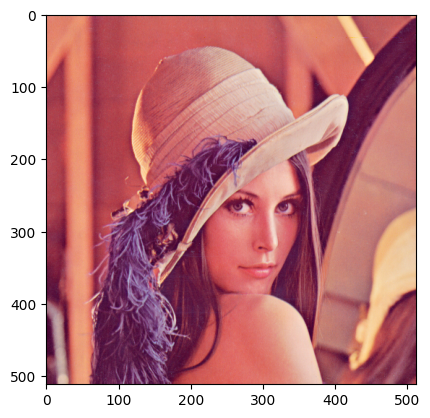

In [2]:
img = cv2.cvtColor(cv2.imread('images/Lenna.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

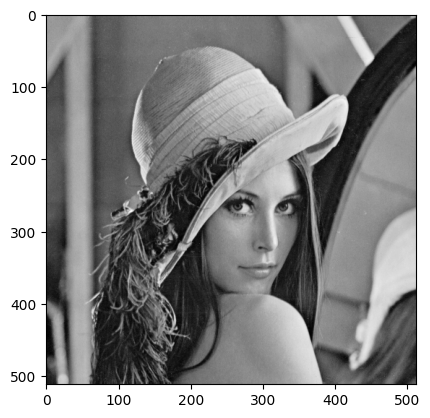

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

# 2. Correlation Filter


In [4]:
def linearTransf(img, gmax, gmin):

    fmin = np.min(img)
    fmax = np.max(img)

    img_transf = np.full_like(img, 0)

    for idx, x in np.ndenumerate(img):

        g = ((gmax - gmin) / (fmax - fmin)) * (x - fmin) + gmin

        img_transf[idx[0], idx[1]] = g

    return img_transf

def correlationFilter(img, kernel):

    height, width = img.shape

    img_aux = np.zeros((height + 2, width + 2)).astype(np.float64)

    img_aux[1:-1, 1:-1] = img.astype(np.float64)

    img_transf = np.full_like(img, 0).astype(np.float64)

    for idx, x in np.ndenumerate(img_aux):

        row = idx[0] + 1
        col = idx[1] + 1

        if row < img_aux.shape[0] - 1 and col < img_aux.shape[1] - 1:

            neighbors = img_aux[row - 1:row + 2,
                                col - 1:col + 2]

            new_value = np.sum(neighbors * kernel)

            img_transf[row - 1, col - 1] = new_value

    img_final = linearTransf(img_transf, 0, 255)

    return img_final.astype(np.uint8)

In [5]:
corr_kernel = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

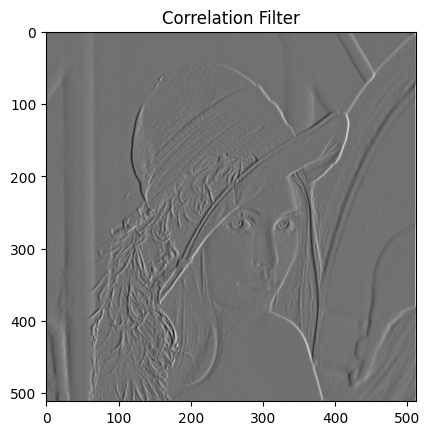

In [6]:
correlation_img = correlationFilter(img_gray, corr_kernel)

plt.imshow(correlation_img, cmap='gray')

plt.title('Correlation Filter')

plt.show()

# 3. Convolution Filter

In [7]:
def convolutionFilter(img, kernel):

    kernel = np.flip(kernel, 1)

    height, width = img.shape

    img_aux = np.zeros((height + 2, width + 2)).astype(np.float64)

    img_aux[1:-1, 1:-1] = img.astype(np.float64)

    img_transf = np.full_like(img, 0).astype(np.float64)

    for idx, x in np.ndenumerate(img_aux):

        row = idx[0] + 1
        col = idx[1] + 1

        if row < img_aux.shape[0] - 1 and col < img_aux.shape[1] - 1:

            neighbors = img_aux[row - 1:row + 2,
                                col - 1:col + 2]

            new_value = np.sum(neighbors * kernel)

            img_transf[row - 1, col - 1] = new_value

    img_final = linearTransf(img_transf, 0, 255)

    return img_final.astype(np.uint8)

In [8]:
conv_kernel = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

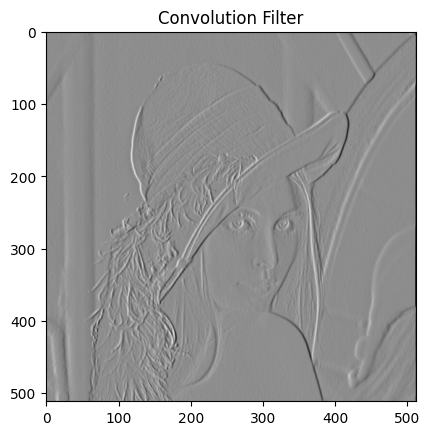

In [9]:
convolution_img = convolutionFilter(img_gray, conv_kernel)

plt.imshow(convolution_img, cmap='gray')

plt.title('Convolution Filter')

plt.show()

# 4. Results

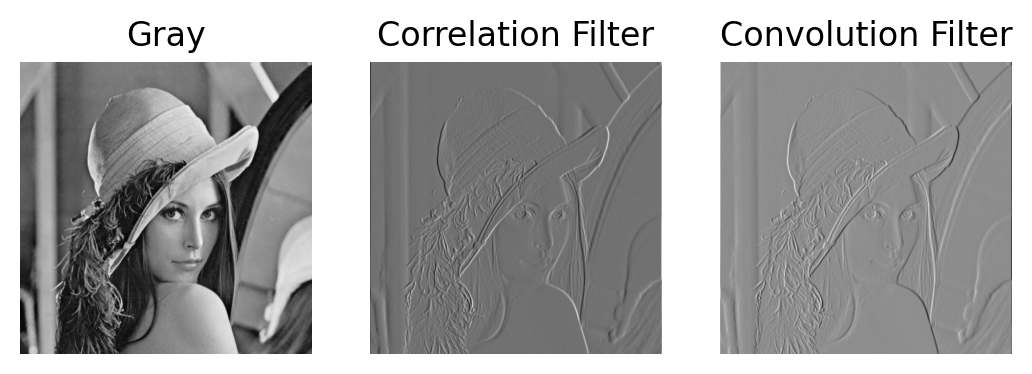

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, dpi = 200)

ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(correlation_img, cmap='gray')
ax[2].imshow(convolution_img, cmap='gray')

ax[0].set_title('Gray')
ax[0].axis('off')
ax[1].set_title('Correlation Filter')
ax[1].axis('off')
ax[2].set_title('Convolution Filter')
ax[2].axis('off')

plt.show()